<a href="https://colab.research.google.com/github/sfsernao/Bootcamp_BSU_MIT/blob/main/Integrated_MZI_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Aim Photonics Academy
#INPHO-BOOT 2023

Mach-Zehnder Interferometer Visualization

In [7]:
# Importing the different packages
from typing import Dict
from typing import List
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [12, 7]

In [8]:
filename="/content/MZI_Long_AmbTemp.csv"  #Edit this! Make sure it has been uploaded. 
# Remember to save copies of your plots in your google drive so you can access the plots later

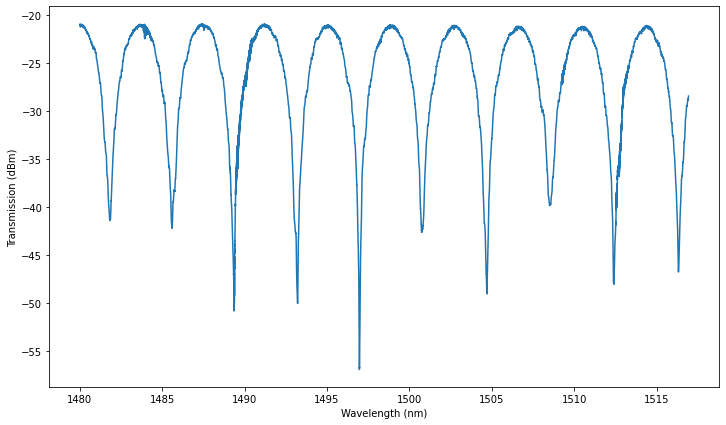

In [9]:
# Plot in dBm of the long MZI
data=pd.read_csv(filename, sep=',' , skiprows=0, skip_blank_lines=True, header=None)

dataX=np.array(data.iloc[1:][0])   # Definition of the array for the wavelenghts in nanometers
dataY=np.array(data.iloc[1:][1])   # Definition of the power in dBm

# Plotting the data
fig, ax=plt.subplots()
ax.plot(dataX,dataY)
# Defining the labels
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dBm)')

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)

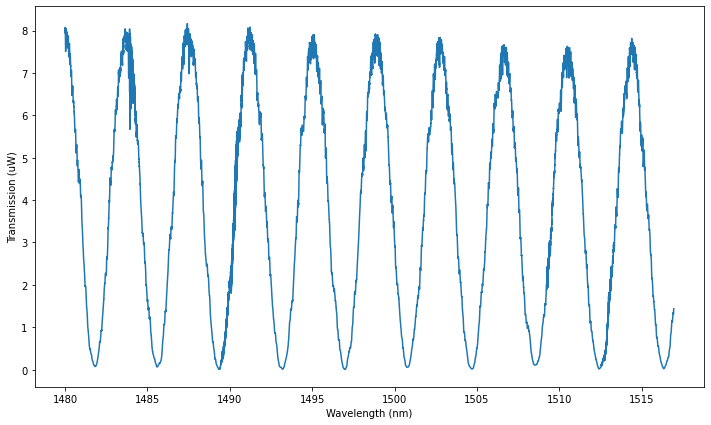

In [10]:
## Plot of the linear power
# Linearizing the power data (conversion from dBm to mW and multiplying by 1000 to convert into microWatts)
# Question for the students ; if you assume the coupling efficiency into and from the chip equal. What would be the efficiency if the input power is 1 mW
dataY_linear=10**(dataY/10)*1000

fig, ax=plt.subplots()
ax.plot(dataX,dataY_linear)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (uW)')

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)


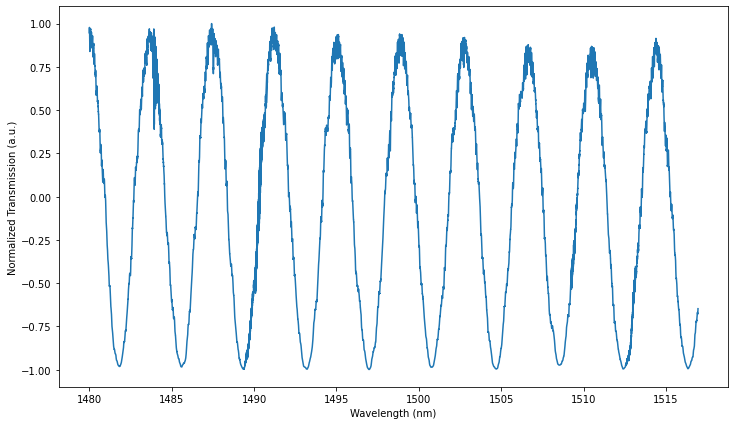

In [38]:
# Normalization of the data, getting the values of the cosine between -1 and +1
Max_Trans=max(dataY_linear)
dataY_norm=(dataY_linear/Max_Trans)*2-1

fig, ax=plt.subplots()
ax.plot(dataX,dataY_norm)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Transmission (a.u.)')

textstr = None

ax.text(0.05, 0.95, textstr, fontsize=12,   transform=ax.transAxes,   verticalalignment='top')
ax.ticklabel_format(useOffset=False)

0.9244177917164361 1.6305624485894434


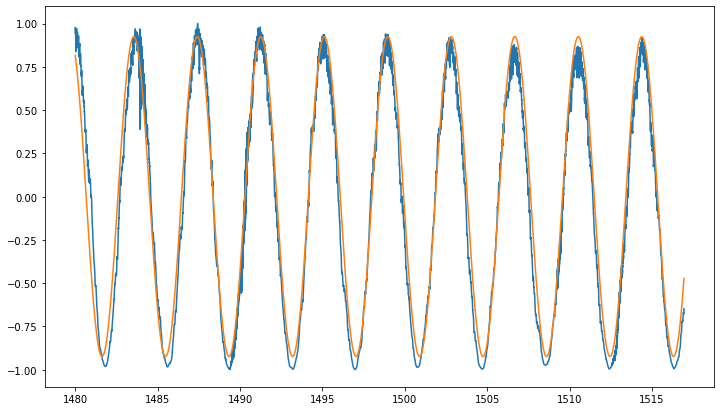

In [109]:
# Fitting the data into a cosine function
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y
# 1.63
guess = [1,1.63]
parameters, covariance = curve_fit(cos_func, dataX, dataY_norm, p0=guess)
fit_D = parameters[0] # Fit for the amplitue
fit_E = parameters[1] # Fit for the argument of the cosine

fit_cosine = cos_func(dataX, fit_D, fit_E)

plt.plot(dataX, dataY_norm, label='data')
plt.plot(dataX, fit_cosine, '-', label='fit')
print (fit_D, fit_E)  # Print the found values for the amplitude and the argument of the cosine function